In [1]:
import numpy as np
import matplotlib.pyplot as plt
import camb
from camb import model

# Auxiliar 7: CMB observacional

### Ejercicio 1

Partiremos ploteando el $C(l)$ del CMB, que, como vimos en clases, es la varianza de las amplitudes del CMB. 

In [2]:
# Parámetros cosmológicos 

H0 = 67.4 # km/s/Mpc
omega_m = 0.315
omega_ch2 = 0.120
omega_bh2 = 0.0224 
ns = 0.965
tau = 0.054

In [3]:
pars = camb.CAMBparams()
pars.set_cosmology(H0=H0, ombh2=omega_bh2, omch2=omega_ch2, mnu=0.06, omk=0)
pars.InitPower.set_params(As=2.1e-9, ns=ns)

# Imponemos un l máximo
lmax = 2500
pars.set_for_lmax(lmax, lens_potential_accuracy=1)

# Corremos CAMB
results = camb.get_results(pars)

# Obtenemos Cl's
cls = results.get_total_cls(lmax=lmax, CMB_unit='muK', raw_cl=True)

# Construimos arrays de l y D_l = l(l+1)C_l/(2π)
ells = np.arange(cls.shape[0])
Dl_TT = ells * (ells + 1) * cls[:, 0] / (2 * np.pi)

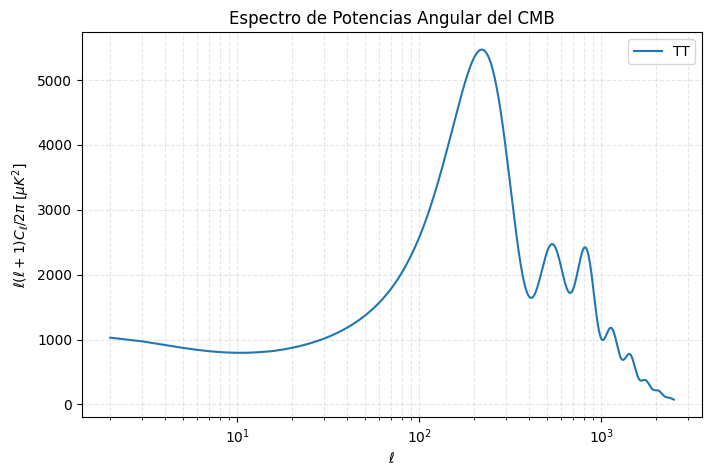

In [4]:
# Ploteamos
plt.figure(figsize=(8,5))
plt.plot(ells[2:], Dl_TT[2:], label='TT')
plt.xscale('log')
plt.xlabel(r'$\ell$')
plt.ylabel(r'$\ell(\ell+1)C_\ell/2\pi\ [\mu K^2]$')
plt.legend()
plt.title('Espectro de Potencias Angular del CMB')
plt.grid(True, which='both', ls='--', alpha=0.3)
plt.show()

El primer peak se debe al horizonte de sonido (es la compresión más chica que puede tener la materia). 

El segundo peak se ve afectado más por bariones. 

El tercer peak se ve afectado más por cold dark matter.

### Ejercicio 2

Ahora veremos como varía con algún parámetro cosmológico. Eligiremos la **densidad de la CDM**, $\Omega_c h^2$

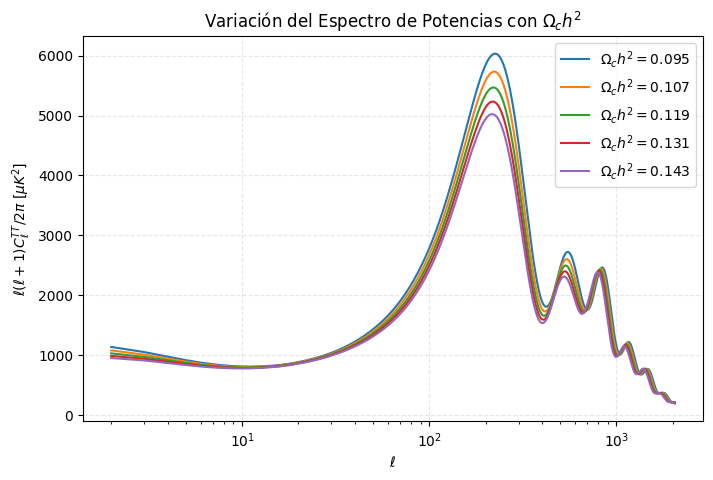

In [5]:
# función para obtener Dl_TT dado omega_c h^2
def get_cls(ombh2, omch2, H0=67.5, ns=0.965, As=2.1e-9):
    pars = camb.CAMBparams()
    pars.set_cosmology(H0=H0, ombh2=ombh2, omch2=omch2, mnu=0.06, omk=0)
    pars.InitPower.set_params(As=As, ns=ns)
    pars.set_for_lmax(2000, lens_potential_accuracy=0)
    results = camb.get_results(pars)
    cls = results.get_total_cls(CMB_unit='muK', raw_cl=True)
    ells = np.arange(cls.shape[0])
    Dl_TT = ells*(ells+1)*cls[:,0]/(2*np.pi)
    return ells, Dl_TT

# valores fijos para bariones
ombh2 = 0.022
# variamos omch2 
omch2_values = [0.095, 0.107, 0.119, 0.131, 0.143]

plt.figure(figsize=(8,5))
for omch2 in omch2_values:
    ells, Dl_TT = get_cls(ombh2, omch2)
    label = r'$\Omega_c h^2 = %.3f$' % omch2
    plt.plot(ells[2:], Dl_TT[2:], label=label)

plt.xlabel(r'$\ell$')
plt.ylabel(r'$\ell(\ell+1)C_\ell^{TT}/2\pi\ [\mu K^2]$')
plt.xscale('log')
plt.legend()
plt.title('Variación del Espectro de Potencias con $\Omega_c h^2$')
plt.grid(True, ls='--', alpha=0.3)
plt.show()



Vemos que, mientras $\Omega_c h^2$ aumenta, segundo peak del espectro angular disminuye, porqué pasa esto?

-> Primer peak: Podríamos decir que, al aumentar la materia oscura, el horizonte del sonido es más chico. 

-> Segundo peak: ...

-> Tercer peak: ...

También podemos ampliar el análisis y decir que más densidad de CDM implica:

1. Mayor crecimiento de estructuras. 

2. Menos ISW, ya que los potenciales decaen menos después de la recombinación. 

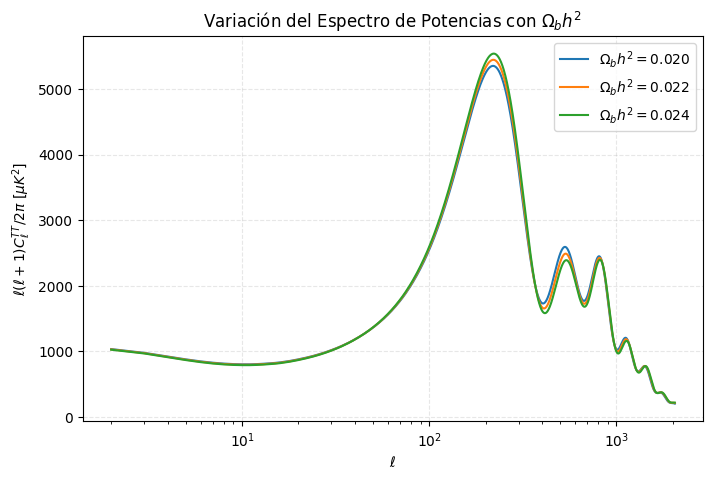

In [6]:
# valores fijos para materia oscura
omch2 = 0.12
# variamos ombh2 
ombh2_values = [0.020, 0.022, 0.024]

plt.figure(figsize=(8,5))
for ombh2 in ombh2_values:
    ells, Dl_TT = get_cls(ombh2, omch2)
    label = r'$\Omega_b h^2 = %.3f$' % ombh2
    plt.plot(ells[2:], Dl_TT[2:], label=label)

plt.xlabel(r'$\ell$')
plt.ylabel(r'$\ell(\ell+1)C_\ell^{TT}/2\pi\ [\mu K^2]$')
plt.title('Variación del Espectro de Potencias con $\Omega_b h^2$')
plt.xscale('log')
plt.legend()
plt.grid(True, ls='--', alpha=0.3)
plt.show()
